# 第九章 绘图和可视化

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


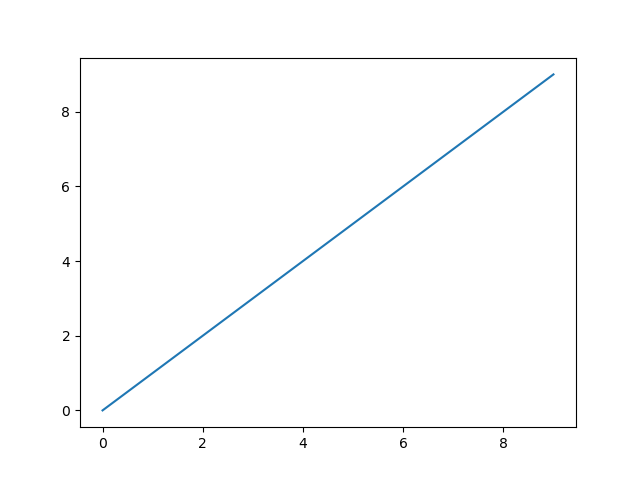

In [4]:
plt.plot(data)

<IPython.core.display.Javascript object>


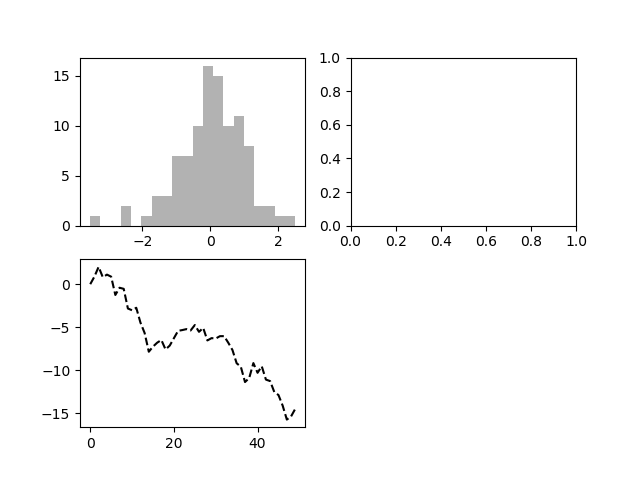

In [5]:
# matplotlib都在figure对象中

fig = plt.figure()

In [6]:
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

In [7]:
plt.plot(np.random.randn(50).cumsum(), 'k--')              #默认是在最后一个sub上操作

In [8]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  0.,  0.,  2.,  0.,  1.,  3.,  3.,  7.,  7., 10., 16., 15.,
        10., 11.,  8.,  2.,  2.,  1.,  1.]),
 array([-3.53477282, -3.23254288, -2.93031294, -2.628083  , -2.32585307,
        -2.02362313, -1.72139319, -1.41916326, -1.11693332, -0.81470338,
        -0.51247344, -0.21024351,  0.09198643,  0.39421637,  0.6964463 ,
         0.99867624,  1.30090618,  1.60313612,  1.90536605,  2.20759599,
         2.50982593]),
 <a list of 20 Patch objects>)

<IPython.core.display.Javascript object>


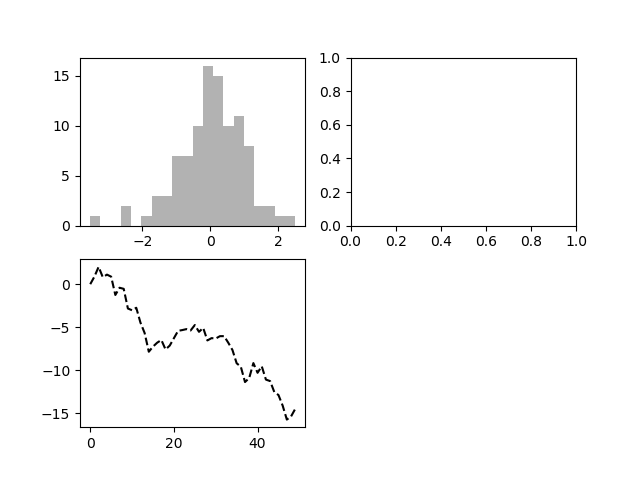

In [9]:
fig

<IPython.core.display.Javascript object>


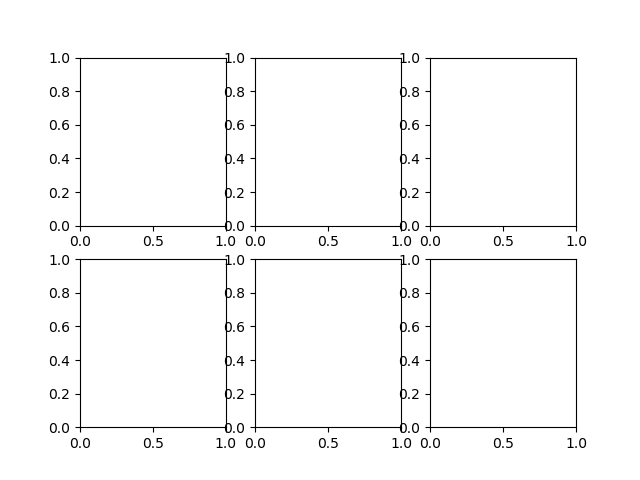

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB9F7B8>,
      dtype=object)

In [10]:
fig, axes = plt.subplots(2, 3)
axes                                          #创建子对象

<IPython.core.display.Javascript object>


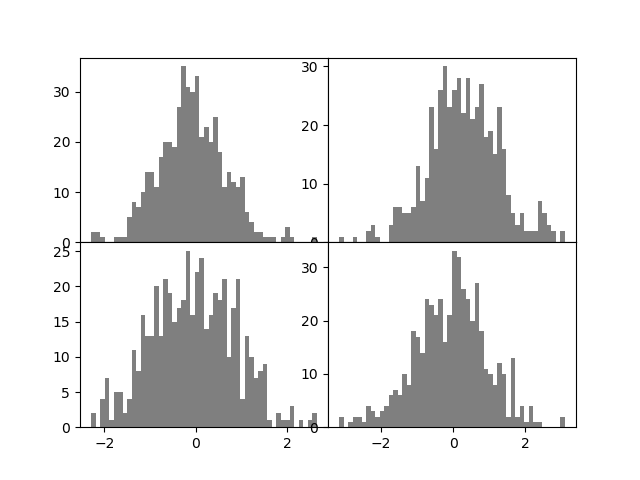

In [11]:
fig, axes = plt.subplots(2, 2)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [12]:
# wspace, hspace用于控制宽度和高度的百分比，用作subplot之间的间距
plt.subplots_adjust(wspace = 0, hspace = 0)

In [13]:
# 根据x和y绘制绿色虚线
# ax.plot(x, y, 'g--')
# ax.plot(x, y, linestyle='--', color='g')    可以达到同样的效果，以更明确的方式进行定义

<IPython.core.display.Javascript object>


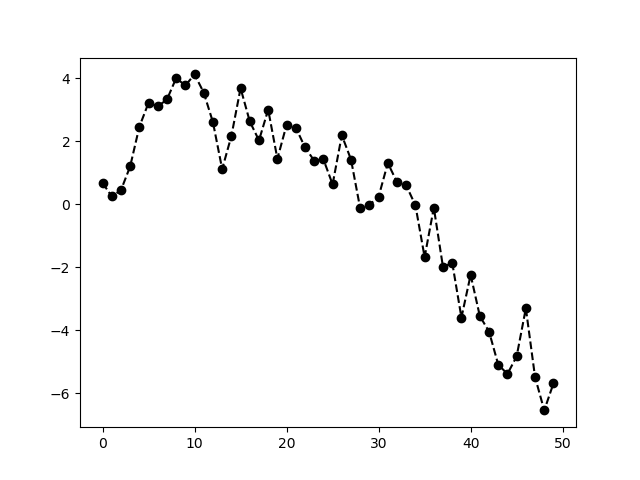

In [14]:
# 线图可以使用标记强调数据点

fig = plt.figure()
plt.plot(np.random.randn(50).cumsum(), 'ko--')

<IPython.core.display.Javascript object>


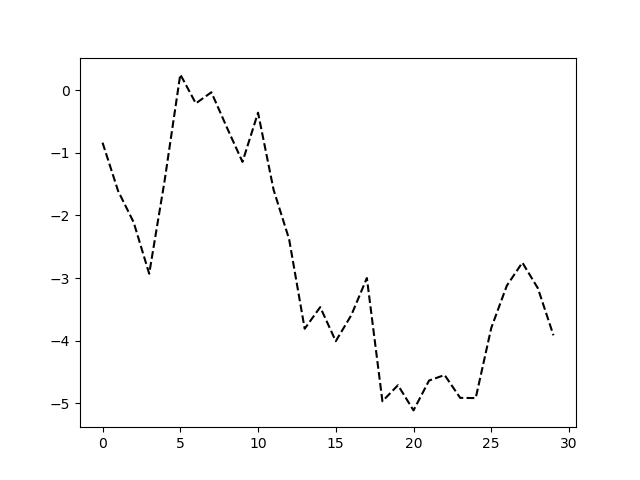

In [15]:
# 线形图中，非实际数据点默认是按线性方式插值的，可以通过drawstyle选项修改

data = np.random.randn(30).cumsum()
fig = plt.figure()
plt.plot(data, 'k--', label='Default')

<IPython.core.display.Javascript object>


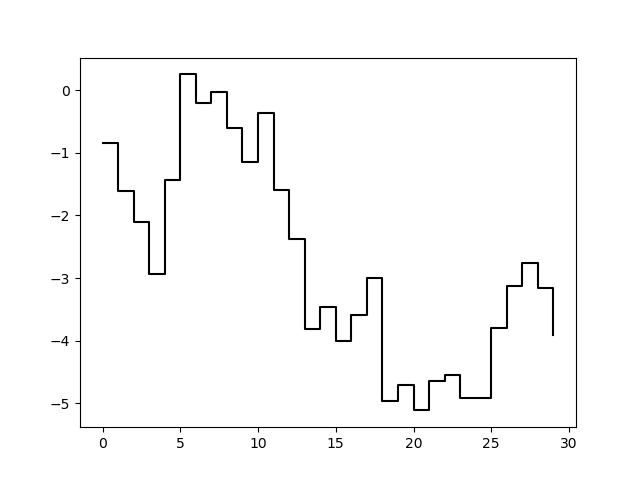

In [16]:
fig = plt.figure()
plt.plot(data, 'k-', drawstyle = 'steps-post', label = 'steps-post')

<IPython.core.display.Javascript object>


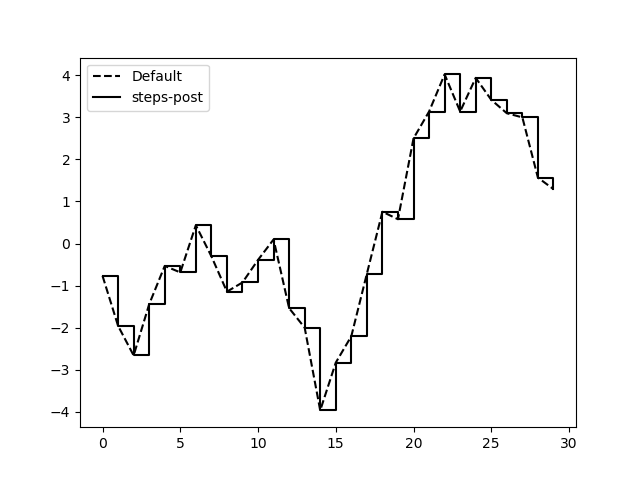

In [17]:
data = np.random.randn(30).cumsum()
fig = plt.figure()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

#### 必须调用plt.legend(或使用ax.legend,如果引用了轴的话)来创建图例，无论是否传递label标签选项

### 刻度、标签和图例

#### 对于大多数的图表装饰项，主要实现方式有两种:
    1.使用过程型的pyplot接口(matplotlib.pyplot)
    2.面向对象的原生matplotlib API
#### pyplot接口的设计目的就是交互式使用，含有诸如xlim、xticks和xticklabels之类的方法，分别控制图表的范围、刻度位置、刻度标签等。使用方式有两种:
    1.调用时不带参数，则返回当前的参数值(例如，plt.xlim()返回当前的X轴绘图范围)
    2.调用时带参数，则设置参数值(例如，plt.xlim([0,10])会将X轴的范围设置为0到10)。
#### 这些方法都是对当前或最近创建的AxesSubplot起作用的。
#### 各自对应subplot对象上的两个方法，这样表示更明确，在处理多个subplot时更清楚。
    以xlim为例，就是ax.get_xlim和ax.set_xlim. 

### 设置标题、轴标签、刻度以及刻度标签

<IPython.core.display.Javascript object>


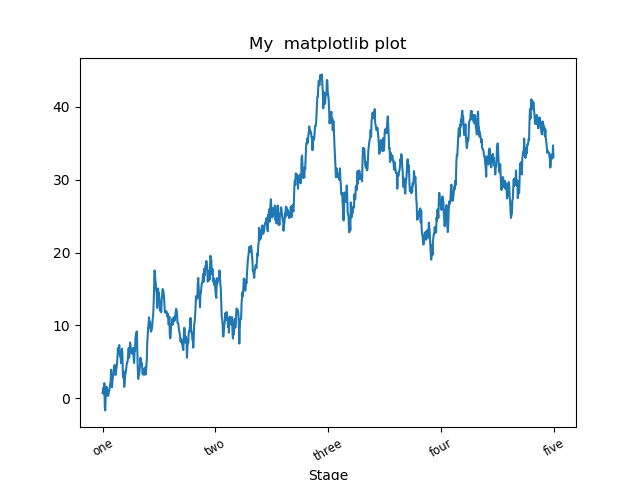

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [19]:
# 改变x轴刻度
ticks = ax.set_xticks([0, 250, 500, 750, 1000])  #默认情况下，这些值也是刻度标签，也可通过set_xticklabels设立
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation = 30, fontsize='small')      #rotation选项设定x刻度标签倾斜30度

In [20]:
#用set_xlabel设置个轴名称，用set_title设置一个标题
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

Text(0.5,0,'Stages')

In [21]:
#y轴修改方式与x轴相同
#轴的类有集合方法，可以批量设定选项
props = {
    'title': 'My  matplotlib plot',
    'xlabel':'Stage'
}
ax.set(**props)

[Text(0.5,0,'Stage'), Text(0.5,1,'My  matplotlib plot')]

#### 添加图例, 要在图例中去除一个或多个元素，不传入label或传入label='nolegend'即可

<IPython.core.display.Javascript object>


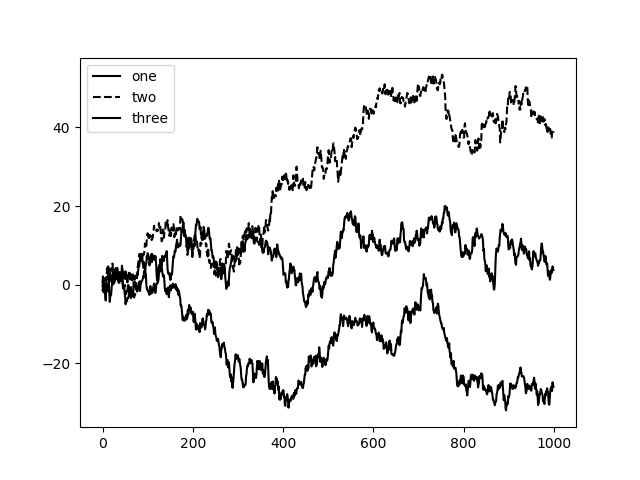

In [22]:
fig = plt.figure();ax = fig.add_subplot(1,1,1)

In [23]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')

In [24]:
ax.plot(np.random.randn(1000).cumsum(), 'k--', label='two')

In [25]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='three')

In [26]:
ax.legend(loc='best')

#### 注解以及在Subplot绘图

##### 可以绘制一些子集的注解，可能是文本、箭头或其他图形，
##### 注解和文字可以通过text、arrow和annotate函数进行添加
#### 例子:标准普尔500指数价格的曲线图，并标出2008-2009金融危机期间的一些重要日期

#### 利用plt.savefig可以将当前图表保存到文件。该方法相当于Figure对象的实例方法savefig。
#### plt.savefig('figpath.svg')

### matplotlib配置

In [27]:
# matplotlib配置
# plt.rc('figure', figsize=(10, 10))             
#第一个参数是希望自定义对象，如'figure'/'axes'/'xtick'/'ytick'/'grid'/'legend'

### 线形图
### 柱状图
### 直方图和密度图
### 散布图或点图
### 分面网络和类型数据
